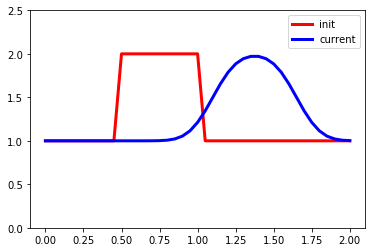

In [4]:
import numpy
from matplotlib import pyplot
import time, sys
%matplotlib inline
nx = 41
dx = 2 / (nx-1)
nt = 25
dt = .025
c = 1

u = numpy.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2

pyplot.ylim([0,2.5])
pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='init')

un = numpy.ones(nx)

for n in range(nt): 
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='current')

pyplot.legend()
pyplot.show()

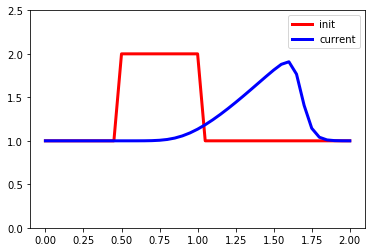

In [6]:
import numpy
from matplotlib import pyplot
import time, sys
%matplotlib inline
nx = 41
dx = 2 / (nx-1)
nt = 25
dt = 0.5 / nt
u = numpy.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2
c = 1
un = numpy.ones(nx)
pyplot.ylim([0,2.5])
pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='init')

for n in range(nt): 
    un = numpy.copy(u)
    for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
        
pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='current')
pyplot.legend()
pyplot.show()

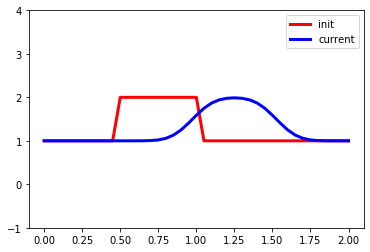

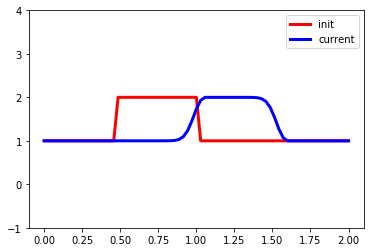

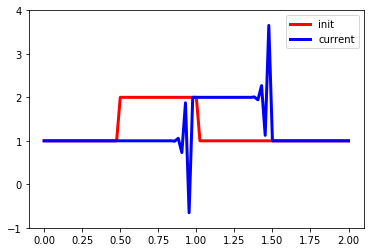

In [31]:
import numpy
from matplotlib import pyplot
#import time, sys
%matplotlib inline
def linearconv(nx): 
    dx = 2 / (nx-1)
    nt = 20
    dt = .025
    c = 1
    u = numpy.ones(nx)
    u[int(.5 / dx):int(1 / dx + 1)] = 2
    pyplot.ylim([-1,4])
    pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='init')
    un = numpy.ones(nx)
    for n in range(nt): 
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='current')
    pyplot.legend()
    pyplot.show()
    
linearconv(41)
linearconv(71)
linearconv(85)
    

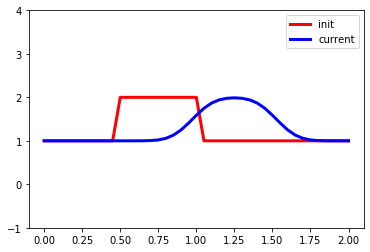

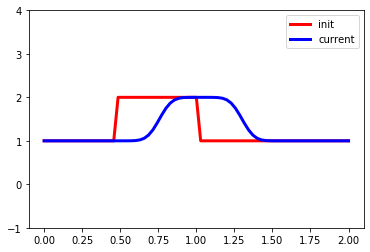

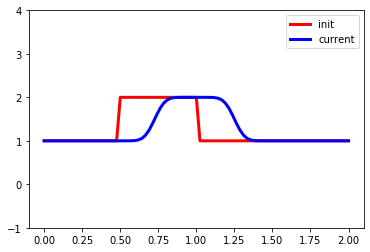

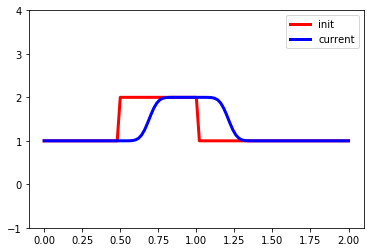

In [34]:
import numpy
from matplotlib import pyplot
#import time, sys
%matplotlib inline
def linearconv(nx): 
    dx = 2 / (nx-1)
    nt = 20
    sigma = 0.5
    #dt = .025
    dt = sigma*dx
    c = 1
    u = numpy.ones(nx)
    u[int(.5 / dx):int(1 / dx + 1)] = 2
    pyplot.ylim([-1,4])
    pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='init')
    un = numpy.ones(nx)
    for n in range(nt): 
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='current')
    pyplot.legend()
    pyplot.show()
    
linearconv(41)
linearconv(71)
linearconv(85)
linearconv(101)

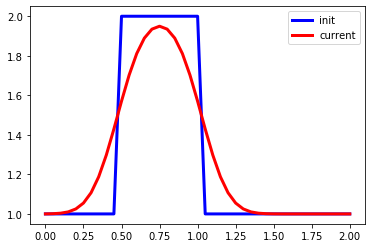

In [35]:
import numpy
from matplotlib import pyplot
%matplotlib inline
nx = 41
dx = 2 / (nx - 1)
nt = 20
nu = 0.3
sigma = 0.2
dt = sigma * dx**2 / nu
u = numpy.ones(nx)
u[int(.5/dx):int(1/dx+1)] = 2
pyplot.plot(numpy.linspace(0,2,nx),u,'b',lw=3,label='init')
un = numpy.ones(nx)
for n in range(nt):
    un = u.copy()    
    for i in range(1,nx-1):
        u[i] = un[i] + nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])
pyplot.plot(numpy.linspace(0,2,nx),u,'r',lw=3,label='current')
pyplot.legend()
pyplot.show()

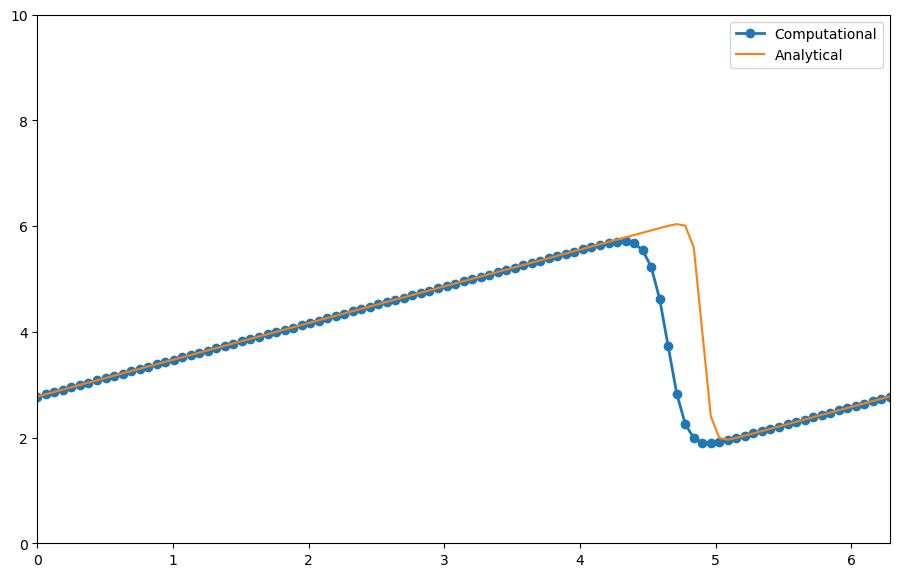

In [54]:
import numpy
import sympy
%matplotlib inline
from sympy import init_printing
init_printing(use_latex=True)

x, nu, t = sympy.symbols(' x nu t ')
phi = (sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1))))
phiprime = phi.diff(x)

from sympy.utilities.lambdify import lambdify
u = -2*nu*(phiprime/phi)+4

ufunc = lambdify((t,x,nu),u)
#print(ufunc(1,4,3))
#print(u)

from matplotlib import pyplot

nx = 101
nt = 100
dx = 2*1.0*numpy.pi / ( nx - 1 )
nu = 0.07
dt = dx * nu
x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0
u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
#print( u )

for n in range(nt):
    un = numpy.copy(u)
    for i in range(nx-1):
        u[i] = un[i] - un[i] * dt/dx * (un[i]-un[i-1])+  nu *1.0* dt/(dx**2) * (un[i+1] - 2*un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx **2 *	(un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]


u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])

pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2*numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend()
pyplot.show()



In [48]:
phi

In [50]:
print(phi)

exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))


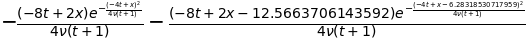

In [51]:
phiprime

In [52]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [71]:
import numpy
u = numpy.array((0, 1, 2, 3, 4, 5))
print('u =', u)
print('len(u) = ',len(u))

s = range(len(u))
print(s)

print('u[1:] =',u[1:])
print('u[0:-1] =',u[0:-1])
print('u[1:] - u[0:-1] =',u[1:] - u[0:-1])


for i in range(1, len(u)):
    print(u[i] - u[i-1])

u = [0 1 2 3 4 5]
len(u) =  6
range(0, 6)
u[1:] = [1 2 3 4 5]
u[0:-1] = [0 1 2 3 4]
u[1:] - u[0:-1] = [1 1 1 1 1]
1
1
1
1
1


In [76]:
%%timeit
import numpy
nx = 81
ny = 81
nt = 100
c = 1
dx = 2*1.0 / (nx-1)
dy = 2*1.0 / (ny-1)
sigma = .2
dt = sigma*dx
x = numpy.linspace(0, 2, nx)
#print('x = ',x)
y = numpy.linspace(0, 2, ny)


u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
#print('u = ',u)

for n in range(nt + 1):
    un = numpy.copy(u)
    row, col = numpy.shape(u)
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i-1])) - (c * dt / dy * (un[j, i] - un[j-1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1


5.33 s ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


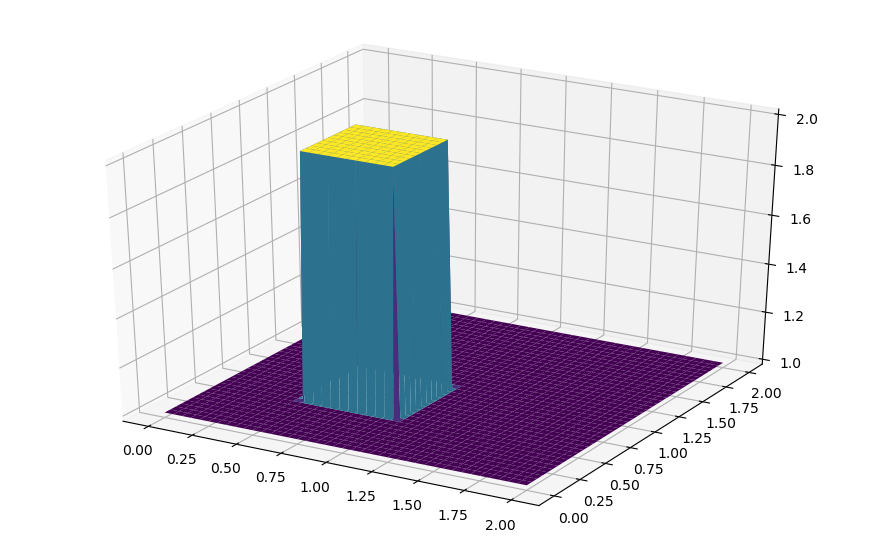

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

nx = 81
ny = 81
nt = 100
c = 1
dx = 2*1.0 / (nx-1)
dy = 2*1.0 / (ny-1)
sigma = .2
dt = sigma*dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap = cm.viridis)
pyplot.show()